지하철 판다스 이용

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

In [21]:
from tabulate import tabulate       # 일단 import가 되어있어서?

In [22]:
df = pd.read_excel('../data/subway.xls', sheet_name='지하철 시간대별 이용현황', header=[0,1])
print(df.info())
# print(tabulate(df.head(), headers='kyes', tablefmt='pretty'))
# 이쁘게 생략 없이 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   (사용월, Unnamed: 0_level_1)    622 non-null    object
 1   (호선명, Unnamed: 1_level_1)    622 non-null    object
 2   (역ID, Unnamed: 2_level_1)    622 non-null    int64 
 3   (지하철역, Unnamed: 3_level_1)   622 non-null    object
 4   (04:00:00~04:59:59, 승차)      622 non-null    object
 5   (04:00:00~04:59:59, 하차)      622 non-null    int64 
 6   (05:00:00~05:59:59, 승차)      622 non-null    object
 7   (05:00:00~05:59:59, 하차)      622 non-null    object
 8   (06:00:00~06:59:59, 승차)      622 non-null    object
 9   (06:00:00~06:59:59, 하차)      622 non-null    object
 10  (07:00:00~07:59:59, 승차)      622 non-null    object
 11  (07:00:00~07:59:59, 하차)      622 non-null    object
 12  (08:00:00~08:59:59, 승차)      622 non-null    object
 13  (08:00:00~08:59:59, 하차)      622 no

In [23]:
df.columns

MultiIndex([(              '사용월',  'Unnamed: 0_level_1'),
            (              '호선명',  'Unnamed: 1_level_1'),
            (              '역ID',  'Unnamed: 2_level_1'),
            (             '지하철역',  'Unnamed: 3_level_1'),
            ('04:00:00~04:59:59',                  '승차'),
            ('04:00:00~04:59:59',                  '하차'),
            ('05:00:00~05:59:59',                  '승차'),
            ('05:00:00~05:59:59',                  '하차'),
            ('06:00:00~06:59:59',                  '승차'),
            ('06:00:00~06:59:59',                  '하차'),
            ('07:00:00~07:59:59',                  '승차'),
            ('07:00:00~07:59:59',                  '하차'),
            ('08:00:00~08:59:59',                  '승차'),
            ('08:00:00~08:59:59',                  '하차'),
            ('09:00:00~09:59:59',                  '승차'),
            ('09:00:00~09:59:59',                  '하차'),
            ('10:00:00~10:59:59',                  '승차'),
            ('

In [24]:
df[('호선명', 'Unnamed: 1_level_1')]

0      1호선
1      1호선
2      1호선
3      1호선
4      1호선
      ... 
617    신림선
618    신림선
619    신림선
620    신림선
621    신림선
Name: (호선명, Unnamed: 1_level_1), Length: 622, dtype: object

In [25]:
df[('지하철역', 'Unnamed: 3_level_1')]

0           서울역
1            시청
2            종각
3          종로3가
4          종로5가
         ...   
617          당곡
618          신림
619          서원
620     서울대벤처타운
621    관악산(서울대)
Name: (지하철역, Unnamed: 3_level_1), Length: 622, dtype: object

In [26]:
commute_time_df = df.iloc[:, [1, 3, 10, 12, 14]]
print(tabulate(commute_time_df.head(), headers='keys', tablefmt='psql'))
# 진짜 생략이 안되네

+----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------+---------------------------------+
|    | ('호선명', 'Unnamed: 1_level_1')   | ('지하철역', 'Unnamed: 3_level_1')   | ('07:00:00~07:59:59', '승차')   | ('08:00:00~08:59:59', '승차')   | ('09:00:00~09:59:59', '승차')   |
|----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------+---------------------------------|
|  0 | 1호선                              | 서울역                               | 40,205                          | 68,945                          | 68,501                          |
|  1 | 1호선                              | 시청                                 | 7,703                           | 10,616                          | 12,972                          |
|  2 | 1호선                              | 종각                                 | 6,588             

In [27]:
commute_time_df.dtypes

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  승차                    object
08:00:00~08:59:59  승차                    object
09:00:00~09:59:59  승차                    object
dtype: object

In [28]:
commute_time_df[('07:00:00~07:59:59', '승차')] = commute_time_df[('07:00:00~07:59:59', '승차')].apply(lambda x: x.replace(',',''))
commute_time_df[('08:00:00~08:59:59', '승차')] = commute_time_df[('08:00:00~08:59:59', '승차')].apply(lambda x: x.replace(',',''))
commute_time_df[('09:00:00~09:59:59', '승차')] = commute_time_df[('08:00:00~08:59:59', '승차')].apply(lambda x: x.replace(',',''))

print(tabulate(commute_time_df.head(), headers='keys', tablefmt='psql'))

+----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------+---------------------------------+
|    | ('호선명', 'Unnamed: 1_level_1')   | ('지하철역', 'Unnamed: 3_level_1')   |   ('07:00:00~07:59:59', '승차') |   ('08:00:00~08:59:59', '승차') |   ('09:00:00~09:59:59', '승차') |
|----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------+---------------------------------|
|  0 | 1호선                              | 서울역                               |                           40205 |                           68945 |                           68945 |
|  1 | 1호선                              | 시청                                 |                            7703 |                           10616 |                           10616 |
|  2 | 1호선                              | 종각                                 |                   

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27144\3024639207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute_time_df[('07:00:00~07:59:59', '승차')] = commute_time_df[('07:00:00~07:59:59', '승차')].apply(lambda x: x.replace(',',''))
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27144\3024639207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute_time_df[('08:00:00~08:59:59', '승차')] = commute_time_df[('08:00:00~08:59:59', '승차')].apply(lambda x: x.replace(',',''))
C:\Users

In [29]:
commute_time_df = commute_time_df.astype({('07:00:00~07:59:59', '승차'): 'int64'})
commute_time_df = commute_time_df.astype({('08:00:00~08:59:59', '승차'): 'int64'})
commute_time_df = commute_time_df.astype({('09:00:00~09:59:59', '승차'): 'int64'})
print(commute_time_df.dtypes)

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  승차                     int64
08:00:00~08:59:59  승차                     int64
09:00:00~09:59:59  승차                     int64
dtype: object


In [30]:
row_sum_df = commute_time_df.sum(axis=1, numeric_only=True)
passenger_number_list = row_sum_df.to_list()
print(row_sum_df)

0      178095
1       28935
2       28372
3       26536
4       26443
        ...  
617     51015
618     17293
619     50126
620    112893
621     18985
Length: 622, dtype: int64


In [31]:
max_number = row_sum_df.max(axis=0)
print(max_number)

673126


In [32]:
max_index = row_sum_df.idxmax()
max_line, max_station = df.iloc[max_index, [1, 3]]
# 원본 데이터를 찾아감

print(f"출근 시간대 최대 승차 인원역: {max_line} {max_station}, {max_number:,}명")

출근 시간대 최대 승차 인원역: 2호선 신림, 673,126명


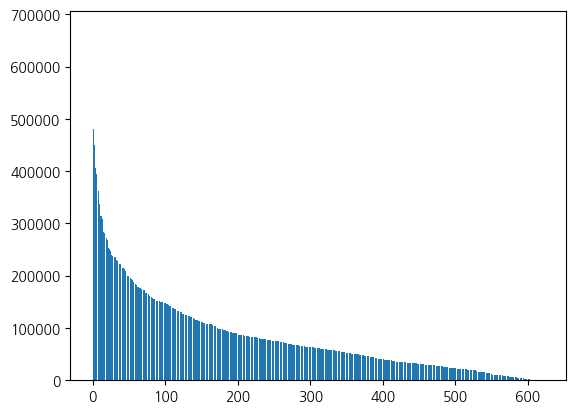

In [33]:
passenger_number_list.sort(reverse=True)

plt.figure(dpi=100)
plt.bar(range(len(passenger_number_list)), passenger_number_list)
plt.show()